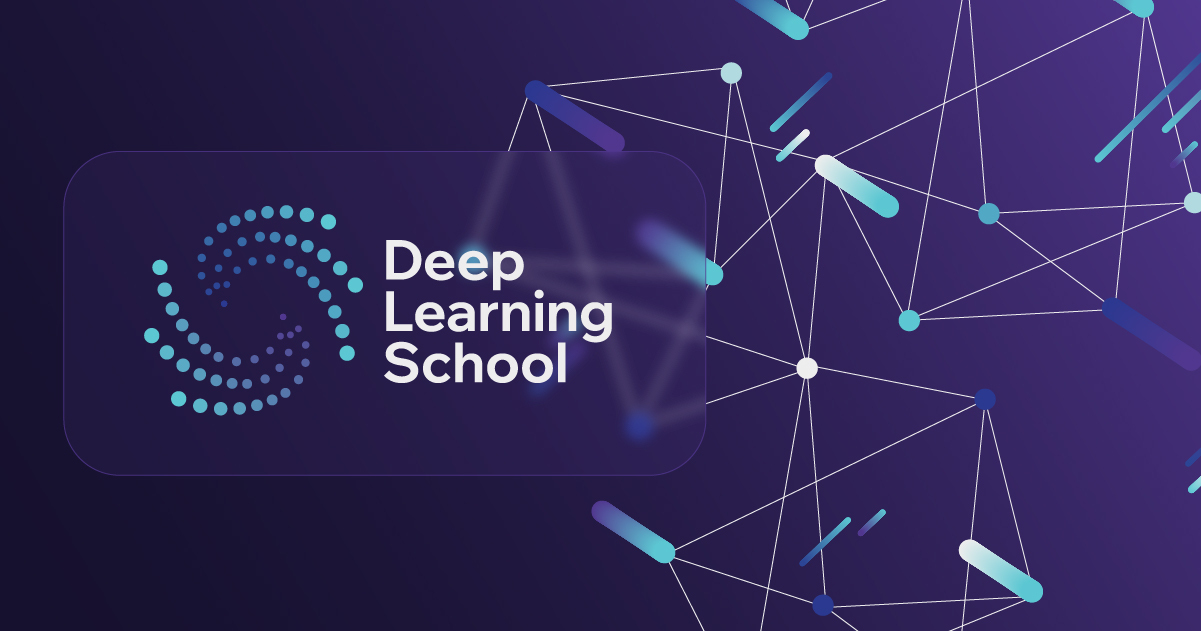

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

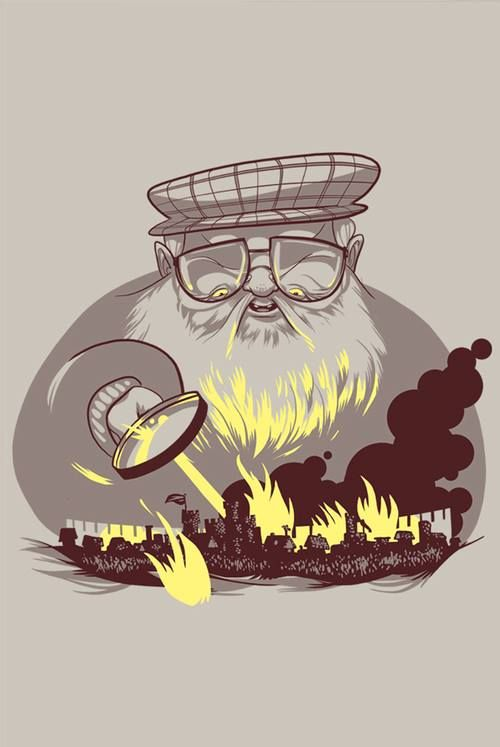

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 41.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 41.3MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [3]:
data = pd.read_csv("/content/game_of_thrones_train.csv", index_col='S.No')

In [4]:
data.head(10)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
6,Tommen Baratheon,NaN,1,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,...,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
7,Valarr Targaryen,Hand of the King,1,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,...,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
8,Viserys I Targaryen,NaN,1,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,...,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
9,Wilbert,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [5]:
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


<Axes: xlabel='S.No'>

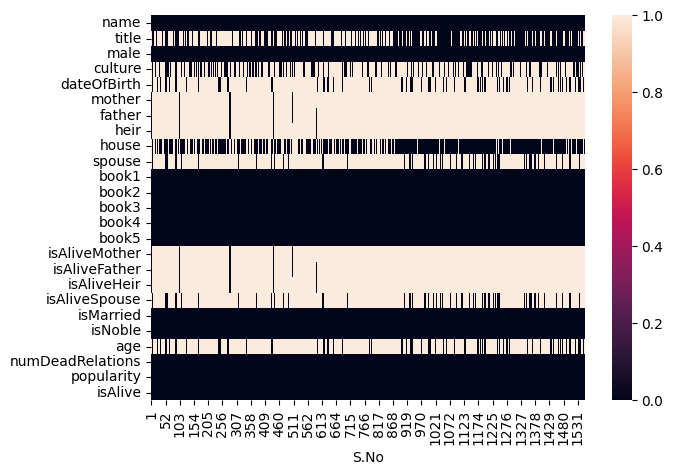

In [6]:
plt.pyplot.figure(figsize=(7,5))
sns.heatmap(data.isna().transpose())

In [7]:
na_percentage = round((data['isAliveMother'].isna().sum() / len(data['isAliveMother'])) * 100, 3)
print(f'{na_percentage} % пропущенных данных у признака isAliveMother')

98.844 % пропущенных данных у признака isAliveMother


In [8]:
(data.isna().sum() / len(data)).round(4) * 100

,0
name,0.00
title,53.95
male,0.00
culture,68.66
dateOfBirth,82.08
mother,98.84
father,98.59
heir,98.65
house,24.47
spouse,87.15


In [9]:
data.drop(columns=["mother", 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir'], inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   house             1176 non-null   object 
 6   book1             1557 non-null   int64  
 7   book2             1557 non-null   int64  
 8   book3             1557 non-null   int64  
 9   book4             1557 non-null   int64  
 10  book5             1557 non-null   int64  
 11  isAliveSpouse     200 non-null    float64
 12  isMarried         1557 non-null   int64  
 13  isNoble           1557 non-null   int64  
 14  age               279 non-null    float64
 15  numDeadRelations  1557 non-null   int64  
 16  popularity        1557 non-null   float64
 17  

In [131]:
# data.drop(columns=['dateOfBirth'], inplace=True)

In [11]:
data.head()

,name,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,0,0,0,0,0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,House Frey,1,1,1,1,1,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,House Swyft,0,0,0,1,0,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,House Arryn,0,0,0,0,0,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,House Santagar,0,0,0,1,0,1.0,1,1,29.0,0,0.043478,1


In [12]:
# заполняем ноликами, т.е. отсутствие информации приравниваем к смерти
data.isAliveSpouse.fillna(0, inplace = True)

<ipython-input-12-8bfa74889ddc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.isAliveSpouse.fillna(0, inplace = True)


In [13]:
data["age"].fillna(data["age"].mean(), inplace=True)
data["culture"].fillna("Other", inplace=True)

<ipython-input-13-b50b1ea7328c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["age"].fillna(data["age"].mean(), inplace=True)
<ipython-input-13-b50b1ea7328c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [135]:
# data.fillna(value='', inplace=True)

In [14]:
data.isna().sum()

,0
name,0
title,840
male,0
culture,0
dateOfBirth,1278
house,381
book1,0
book2,0
book3,0
book4,0


In [15]:
data["dateOfBirth"].fillna(data["dateOfBirth"].mean(), inplace=True)

<ipython-input-15-03a80f54e229>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["dateOfBirth"].fillna(data["dateOfBirth"].mean(), inplace=True)


In [16]:
title_counts = data['title'].value_counts()
rare_titles = title_counts[title_counts < 3]
data.loc[(data.title.isin(rare_titles.keys())), 'title'] = 'Other'
data.loc[(data.title.isna()), 'title'] = 'Other'

In [17]:
data.isna().sum()

,0
name,0
title,0
male,0
culture,0
dateOfBirth,0
house,381
book1,0
book2,0
book3,0
book4,0


In [18]:
# заполняем пропущенные значения фамилией, если есть
def fill_house_nans(row):
    if pd.isna(row['house']):
        parts = row['name'].split()
        if len(parts) > 1:
            return 'House ' + parts[-1]
        else:
            return 'Other'
    return row['house']

data['house'] = data.apply(fill_house_nans, axis=1)
rare_houses = title_counts[title_counts < 5]
data.loc[(data.title.isin(rare_houses.keys())), 'house'] = 'Other'
data.head(10)

,name,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Other,1,Other,247.551971,House Targaryen,0,0,0,0,0,0.0,0,0,35.290323,11,0.605351,0
2,Walder Frey,Other,1,Rivermen,208.000000,House Frey,1,1,1,1,1,1.0,1,1,97.000000,1,0.896321,1
3,Addison Hill,Ser,1,Other,247.551971,House Swyft,0,0,0,1,0,0.0,0,1,35.290323,0,0.267559,1
4,Aemma Arryn,Queen,0,Other,82.000000,Other,0,0,0,0,0,0.0,1,1,23.000000,0,0.183946,0
5,Sylva Santagar,Other,0,Dornish,276.000000,House Santagar,0,0,0,1,0,1.0,1,1,29.000000,0,0.043478,1
6,Tommen Baratheon,Other,1,Other,247.551971,House Baratheon,0,0,0,0,0,0.0,0,0,35.290323,5,1.000000,1
7,Valarr Targaryen,Other,1,Valyrian,183.000000,House Targaryen,0,0,0,0,0,1.0,1,1,26.000000,0,0.431438,0
8,Viserys I Targaryen,Other,1,Other,247.551971,House Targaryen,0,0,0,0,0,0.0,0,0,35.290323,5,0.678930,0
9,Wilbert,Ser,1,Other,247.551971,Other,0,0,1,0,0,0.0,0,1,35.290323,0,0.006689,0


In [19]:
data.drop(columns=['name'], inplace=True)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [20]:
data['isPopular'] = data['popularity'].apply(lambda x: 1 if x >= 0.4 else 0)
data.drop(columns=['popularity'], inplace=True)
data.head()

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,isAlive,isPopular
S.No,,,,,,,,,,,,,,,,,
1,Other,1,Other,247.551971,House Targaryen,0,0,0,0,0,0.0,0,0,35.290323,11,0,1
2,Other,1,Rivermen,208.000000,House Frey,1,1,1,1,1,1.0,1,1,97.000000,1,1,1
3,Ser,1,Other,247.551971,House Swyft,0,0,0,1,0,0.0,0,1,35.290323,0,1,0
4,Queen,0,Other,82.000000,Other,0,0,0,0,0,0.0,1,1,23.000000,0,0,0
5,Other,0,Dornish,276.000000,House Santagar,0,0,0,1,0,1.0,1,1,29.000000,0,1,0


In [21]:
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
data.drop(columns=['numDeadRelations'], inplace=True)
data.head()

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,
1,Other,1,Other,247.551971,House Targaryen,0,0,0,0,0,0.0,0,0,35.290323,0,1,1
2,Other,1,Rivermen,208.000000,House Frey,1,1,1,1,1,1.0,1,1,97.000000,1,1,1
3,Ser,1,Other,247.551971,House Swyft,0,0,0,1,0,0.0,0,1,35.290323,1,0,0
4,Queen,0,Other,82.000000,Other,0,0,0,0,0,0.0,1,1,23.000000,0,0,0
5,Other,0,Dornish,276.000000,House Santagar,0,0,0,1,0,1.0,1,1,29.000000,1,0,0


In [22]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [23]:
def simplify_culture(culture_value):
    if pd.isna(culture_value):
        return culture_value
    culture_value_lower = culture_value.lower()
    for key, values in cult.items():
        if culture_value_lower in [v.lower() for v in values]:
            return key
    return culture_value

data['culture'] = data['culture'].apply(simplify_culture)

data.head()

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,
1,Other,1,Other,247.551971,House Targaryen,0,0,0,0,0,0.0,0,0,35.290323,0,1,1
2,Other,1,Rivermen,208.000000,House Frey,1,1,1,1,1,1.0,1,1,97.000000,1,1,1
3,Ser,1,Other,247.551971,House Swyft,0,0,0,1,0,0.0,0,1,35.290323,1,0,0
4,Queen,0,Other,82.000000,Other,0,0,0,0,0,0.0,1,1,23.000000,0,0,0
5,Other,0,Dornish,276.000000,House Santagar,0,0,0,1,0,1.0,1,1,29.000000,1,0,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [146]:
# выше уже удалила
# data.drop(columns=['name', "mother", 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'dateOfBirth'], inplace=True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

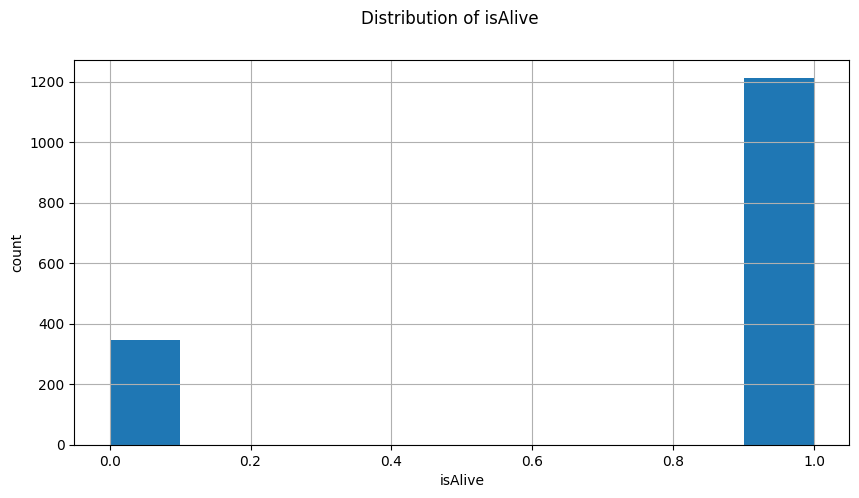

In [24]:
plt.pyplot.figure(figsize = (10, 5))

data['isAlive'].hist()
plt.pyplot.ylabel('count')
plt.pyplot.xlabel('isAlive')

plt.pyplot.suptitle('Distribution of isAlive')
plt.pyplot.show()

In [25]:
# средний процент выживших
print(f"Средний процент выживших: {round(data['isAlive'].mean() * 100, 2)}%")

Средний процент выживших: 77.84%


Сильного перекоса нет.

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [26]:
data.head()

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,
1,Other,1,Other,247.551971,House Targaryen,0,0,0,0,0,0.0,0,0,35.290323,0,1,1
2,Other,1,Rivermen,208.000000,House Frey,1,1,1,1,1,1.0,1,1,97.000000,1,1,1
3,Ser,1,Other,247.551971,House Swyft,0,0,0,1,0,0.0,0,1,35.290323,1,0,0
4,Queen,0,Other,82.000000,Other,0,0,0,0,0,0.0,1,1,23.000000,0,0,0
5,Other,0,Dornish,276.000000,House Santagar,0,0,0,1,0,1.0,1,1,29.000000,1,0,0


In [27]:
categorical_columns = ['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAliveSpouse', 'isMarried', 'isNoble', 'isPopular', 'boolDeadRelations']
categorical_features = data[categorical_columns]

In [28]:
categorical_features

,title,male,culture,house,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,
1,Other,1,Other,House Targaryen,0,0,0,0,0,0.0,0,0,1,1
2,Other,1,Rivermen,House Frey,1,1,1,1,1,1.0,1,1,1,1
3,Ser,1,Other,House Swyft,0,0,0,1,0,0.0,0,1,0,0
4,Queen,0,Other,Other,0,0,0,0,0,0.0,1,1,0,0
5,Other,0,Dornish,House Santagar,0,0,0,1,0,1.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Archmaester,1,Other,Other,1,0,1,1,0,0.0,0,1,0,0
1554,Other,0,Other,House Heddle,1,1,0,0,0,0.0,0,0,0,0
1555,Other,1,Other,House Seaworth,0,1,1,1,1,0.0,0,0,0,0


In [152]:
# data['house'].unique()

In [29]:
unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()
unprocessed_cat_features

['title', 'culture', 'house']

In [38]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

one_hot_encoded = encoder.fit_transform(data[unprocessed_cat_features]).toarray()

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=data.index)

one_hot_df

,title_Archmaester,title_Bitterbridge,title_Bloodrider,title_Brother,title_Casterly Rock,title_Cupbearer,title_Duskendale,title_Eyrie,title_Grand Maester,title_Harrenhal,...,house_R'hllor,house_Sea watch,house_Second Sons,house_Stone Crows,house_Stormcrows,house_Summer Islands,house_The Citadel,house_Windblown,house_Wise Masters,house_wildling
S.No,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
one_hot_df.columns

Index(['title_Archmaester', 'title_Bitterbridge', 'title_Bloodrider',
       'title_Brother', 'title_Casterly Rock', 'title_Cupbearer',
       'title_Duskendale', 'title_Eyrie', 'title_Grand Maester',
       'title_Harrenhal',
       ...
       'house_R'hllor', 'house_Sea watch', 'house_Second Sons',
       'house_Stone Crows', 'house_Stormcrows', 'house_Summer Islands',
       'house_The Citadel', 'house_Windblown', 'house_Wise Masters',
       'house_wildling'],
      dtype='object', length=473)

In [43]:
# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([data, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(unprocessed_cat_features, axis=1)

# Display the resulting dataframe
df_encoded

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,...,house_R'hllor,house_Sea watch,house_Second Sons,house_Stone Crows,house_Stormcrows,house_Summer Islands,house_The Citadel,house_Windblown,house_Wise Masters,house_wildling
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,247.551971,0,0,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,208.000000,1,1,1,1,1,1.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,247.551971,0,0,0,1,0,0.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,82.000000,0,0,0,0,0,0.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,276.000000,0,0,0,1,0,1.0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,247.551971,1,0,1,1,0,0.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1554,0,247.551971,1,1,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1555,1,247.551971,0,1,1,1,1,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
numerical_columns = ['age', 'dateOfBirth']
num_features = data[numerical_columns]
num_features

,age,dateOfBirth
S.No,,
1,35.290323,247.551971
2,97.000000,208.000000
3,35.290323,247.551971
4,23.000000,82.000000
5,29.000000,276.000000
...,...,...
1553,35.290323,247.551971
1554,35.290323,247.551971
1555,35.290323,247.551971


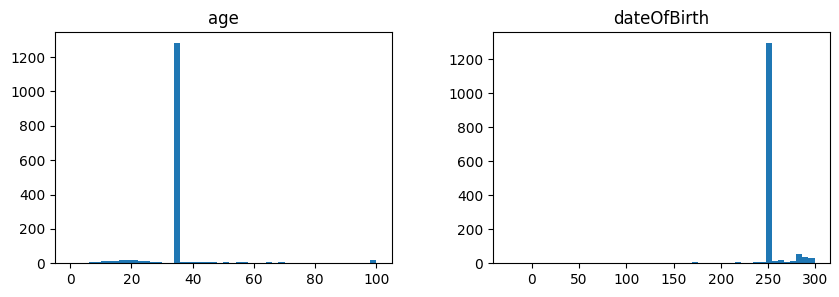

In [45]:
num_features.hist(figsize=(10, 3), bins=50,xlabelsize=10, ylabelsize=10, grid=False);

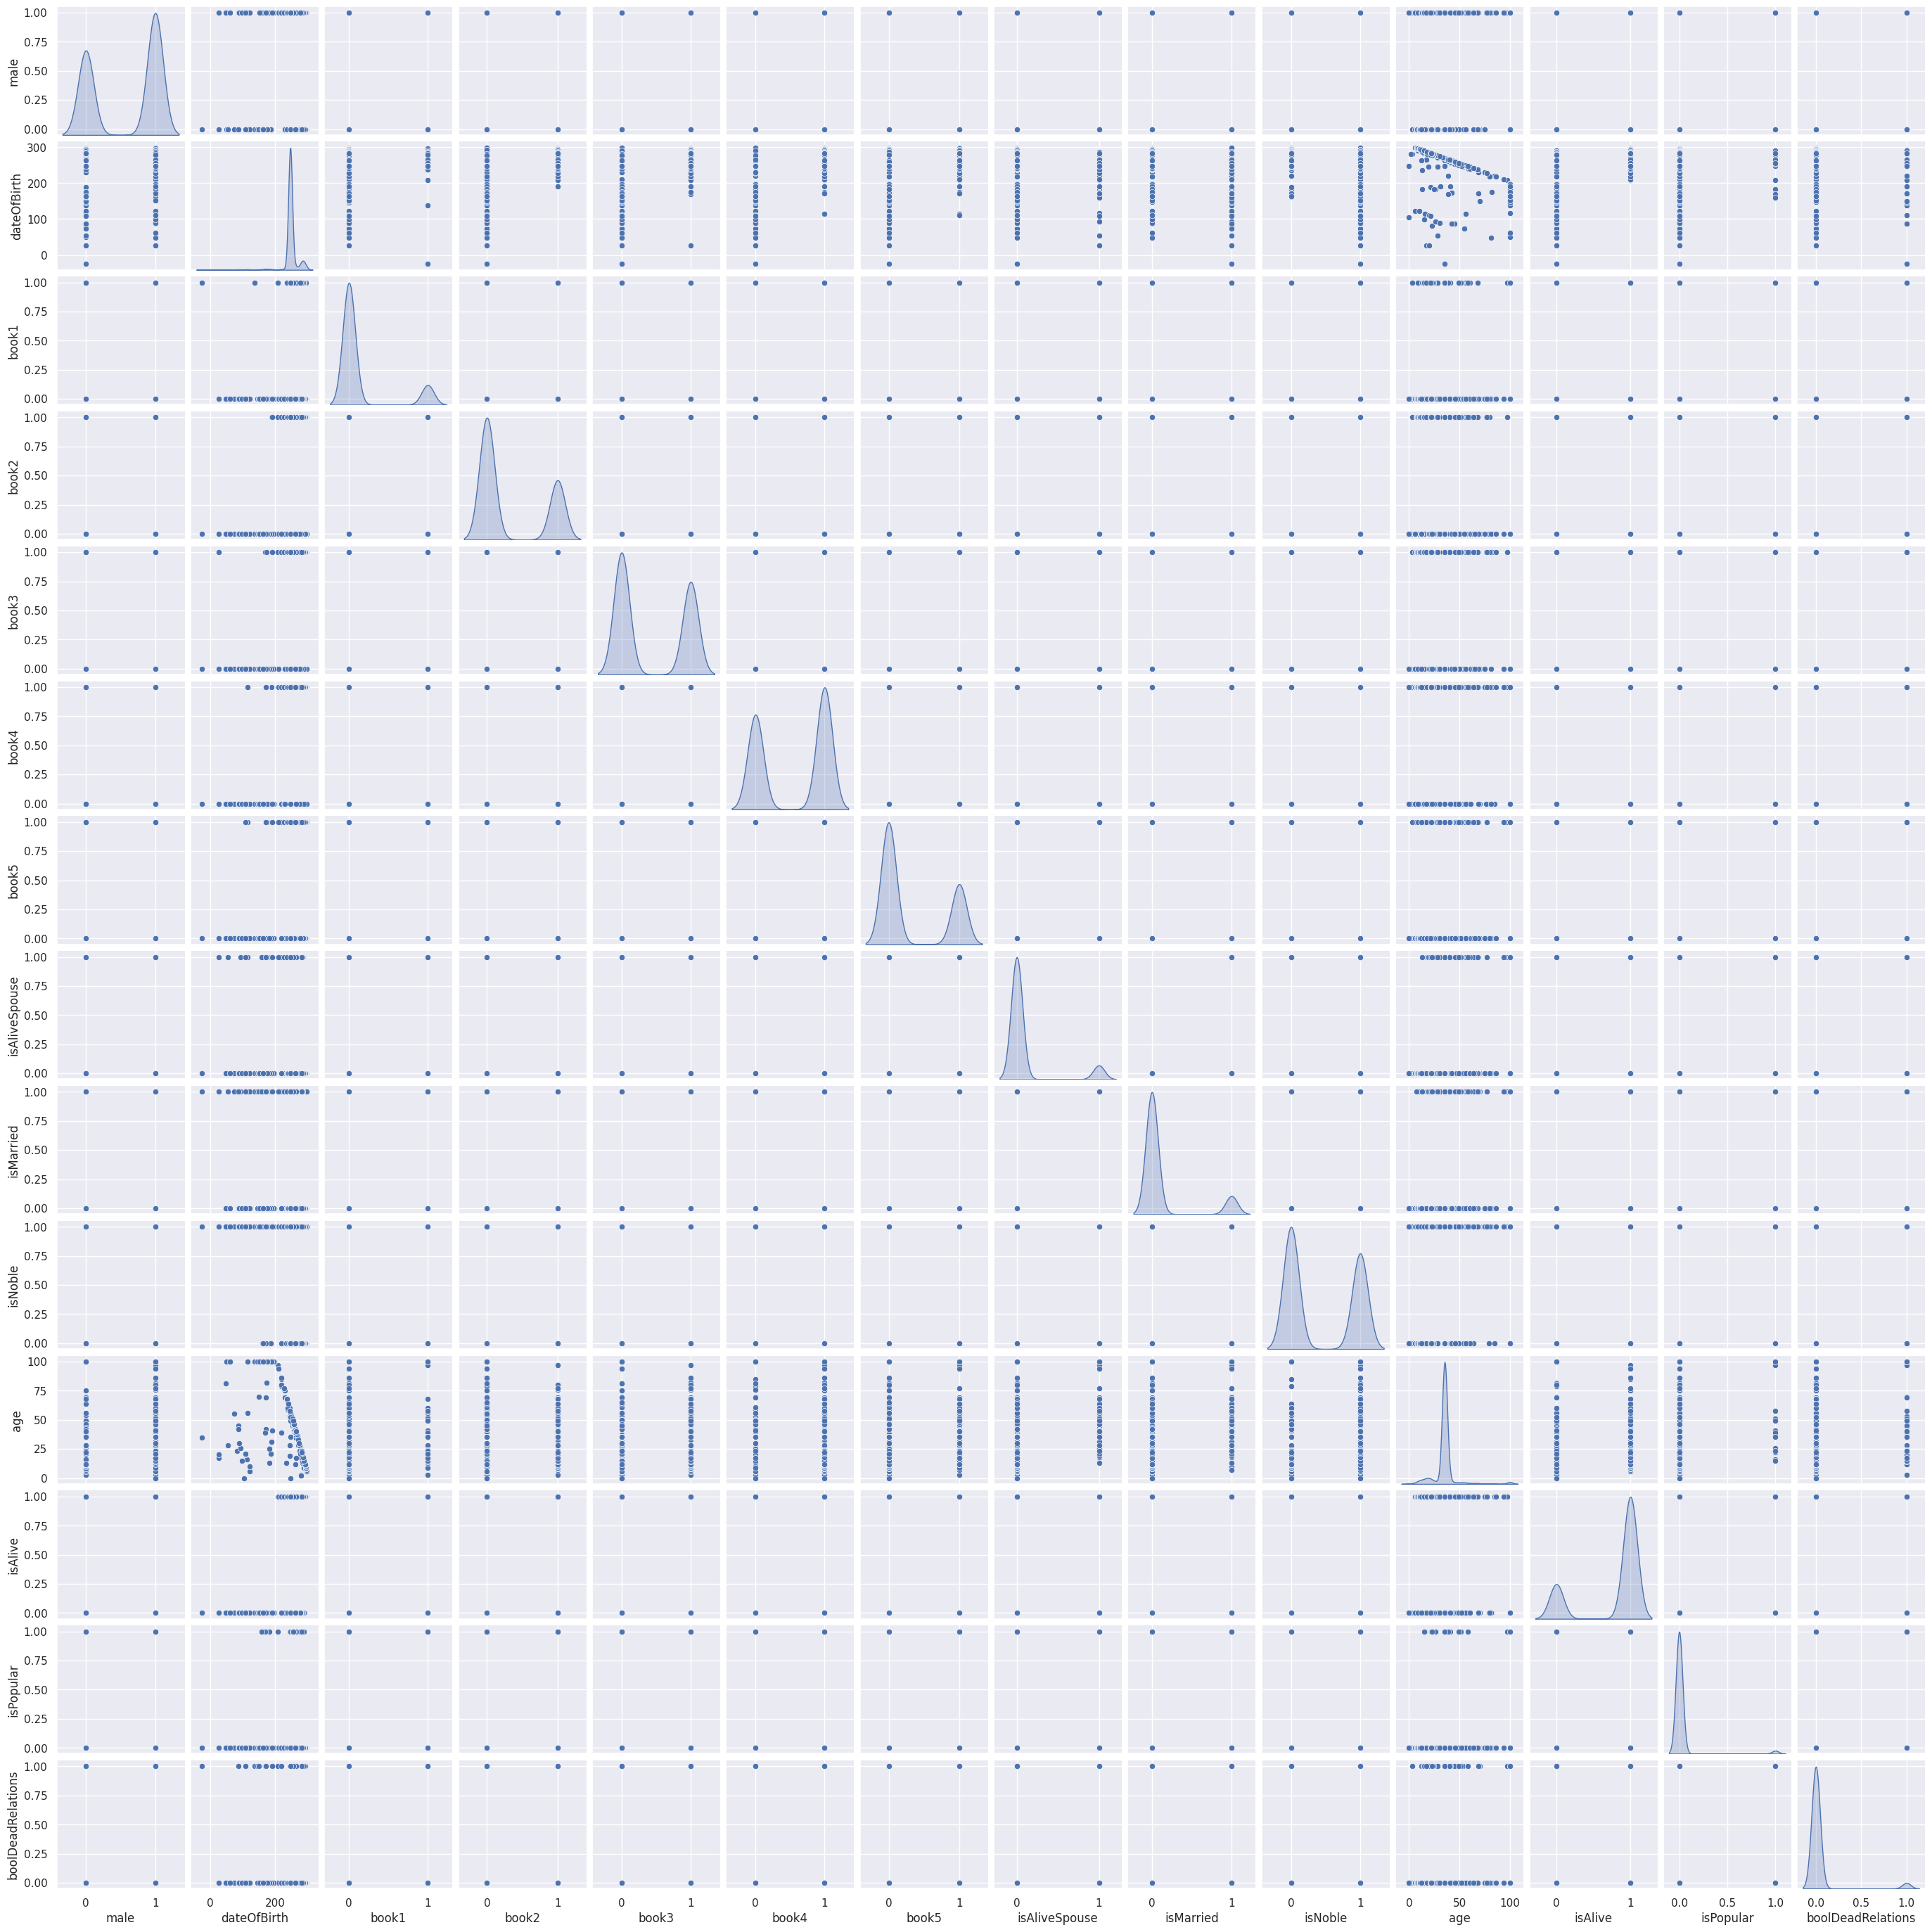

In [46]:
sns.set()
sns.pairplot(data, height = 2 ,kind ='scatter',diag_kind='kde')
plt.pyplot.show()

Есть корреляция между датой рождения и возрастом, т.к. заполнили пропущенные значения средним.

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

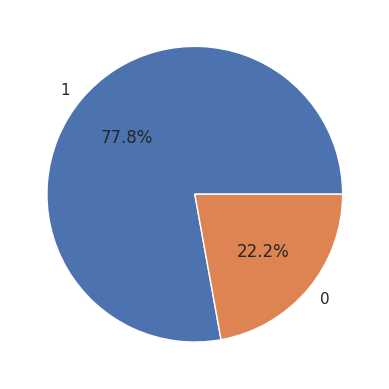

In [47]:
df_values = df_encoded['isAlive'].value_counts()

plt.pyplot.pie(df_values.values, labels=df_values.index, autopct='%1.1f%%')

plt.pyplot.show()

In [48]:
data.head()

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,
1,Other,1,Other,247.551971,House Targaryen,0,0,0,0,0,0.0,0,0,35.290323,0,1,1
2,Other,1,Rivermen,208.000000,House Frey,1,1,1,1,1,1.0,1,1,97.000000,1,1,1
3,Ser,1,Other,247.551971,House Swyft,0,0,0,1,0,0.0,0,1,35.290323,1,0,0
4,Queen,0,Other,82.000000,Other,0,0,0,0,0,0.0,1,1,23.000000,0,0,0
5,Other,0,Dornish,276.000000,House Santagar,0,0,0,1,0,1.0,1,1,29.000000,1,0,0


In [49]:
data[['boolDeadRelations', 'isAlive']].groupby(['boolDeadRelations'], as_index=False).mean()

,boolDeadRelations,isAlive
0,0,0.794355
1,1,0.434783


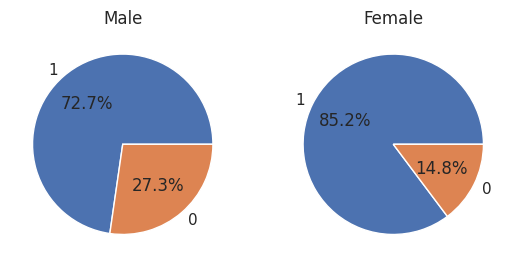

In [50]:
data1 = df_encoded.loc[(df_encoded.male == 1)]['isAlive'].value_counts()
data2 = df_encoded.loc[(df_encoded.male == 0)]['isAlive'].value_counts()
fig, [ax1, ax2] = plt.pyplot.subplots(1,2)
ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax1.set_title("Male")
ax2.set_title("Female")
plt.pyplot.show()

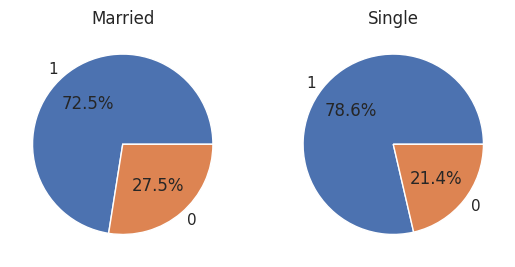

In [51]:
data1 = df_encoded.loc[(df_encoded.isMarried == 1)]['isAlive'].value_counts()
data2 = df_encoded.loc[(df_encoded.isMarried == 0)]['isAlive'].value_counts()
fig, [ax1, ax2] = plt.pyplot.subplots(1,2)
ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax1.set_title("Married")
ax2.set_title("Single")
plt.pyplot.show()

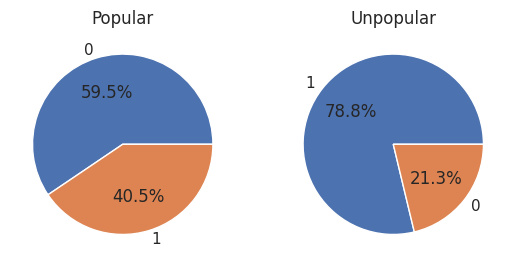

In [52]:
data1 = df_encoded.loc[(df_encoded.isPopular == 1)]['isAlive'].value_counts()
data2 = df_encoded.loc[(df_encoded.isPopular == 0)]['isAlive'].value_counts()
fig, [ax1, ax2] = plt.pyplot.subplots(1,2)
ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax1.set_title("Popular")
ax2.set_title("Unpopular")
plt.pyplot.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [53]:
X = df_encoded.drop(columns=['isAlive']).values
y = df_encoded['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [56]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [57]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [58]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

(Это задание совмещено с 3.1, т.е. сразу оценивается качество моделей)

In [62]:
# AdaBoostClassifier
model1 = AdaBoostClassifier(algorithm='SAMME')
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
# оценка качества:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy AdaBoostClassifier: %.4f" % accuracy)

# RandomForestClassifier
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy RandomForestClassifier: %.4f" % accuracy)

# GaussianProcessClassifier
model3 = GaussianProcessClassifier()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy GaussianProcessClassifier: %.4f" % accuracy)

# GaussianNB
model4 = GaussianNB()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy GaussianNB: %.4f" % accuracy)

# KNeighborsClassifier
model5 = KNeighborsClassifier()
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy KNeighborsClassifier: %.4f" % accuracy)

# SVC
model6 = SVC()
model6.fit(X_train, y_train)
y_pred = model6.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy SVC: %.4f" % accuracy)

# DecisionTreeClassifier
model7 = DecisionTreeClassifier()
model7.fit(X_train, y_train)
y_pred = model7.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy DecisionTreeClassifier: %.4f" % accuracy)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


Accuracy AdaBoostClassifier: 0.8141
Accuracy RandomForestClassifier: 0.7724
Accuracy GaussianProcessClassifier: 0.8333
Accuracy GaussianNB: 0.3974
Accuracy KNeighborsClassifier: 0.8173
Accuracy SVC: 0.8141
Accuracy DecisionTreeClassifier: 0.7724


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [60]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [61]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7949


In [63]:
model3.get_params()

{'copy_X_train': True,
 'kernel': None,
 'max_iter_predict': 100,
 'multi_class': 'one_vs_rest',
 'n_jobs': None,
 'n_restarts_optimizer': 0,
 'optimizer': 'fmin_l_bfgs_b',
 'random_state': None,
 'warm_start': False}

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
from sklearn.metrics import make_scorer

In [66]:
# заново создадим модель
model = GaussianProcessClassifier()

# опишем сетку, по которой будем искать
# внутрь передаются параметры, которыке будем варьировать
param_grid = {
    'max_iter_predict': [20, 40, 60, 80, 100, 120, 140],
}

# создадим объект GridSearchCV
# refit=True значит, что мы обучаем модель заново с наилучшими параметрами;   scoring - метрика
gridsearch = GridSearchCV(model, param_grid, refit=True, scoring='accuracy')

# запустим поиск
gridsearch.fit(X_train, y_train)

# выведем наилучшие параметры
print("Best parameters found: ", gridsearch.best_params_)

best_model = gridsearch.best_estimator_

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy GaussianProcessClassifier: %.4f" % accuracy)

Best parameters found:  {'max_iter_predict': 20}
Accuracy GaussianProcessClassifier: 0.8333


In [67]:
model1.get_params()

{'algorithm': 'SAMME',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [68]:
model = AdaBoostClassifier()

# Опишем сетку, по которой будем искать
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    #'base_estimator__max_depth': [1, 2, 3]
}

# Создадим объект GridSearchCV
gridsearch = GridSearchCV(model, param_grid, refit=True, scoring='accuracy', cv=5)

# Запустим поиск
gridsearch.fit(X_train, y_train)

# Выведем наилучшие параметры
print("Best parameters found: ", gridsearch.best_params_)

# Получим лучшую модель
best_model = gridsearch.best_estimator_

# Обучим лучшую модель на обучающих данных
best_model.fit(X_train, y_train)

# Сделаем предсказания на тестовых данных
y_pred = best_model.predict(X_test)

# Вычислим точность
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy AdaBoostClassifier: %.4f" % accuracy)


Best parameters found:  {'learning_rate': 1.0, 'n_estimators': 200}
Accuracy AdaBoostClassifier: 0.8173


Аналогичным образом посчитайте метрику accuracy для остальных моделей

(В 2.2 уже посчитала)

Выберите лучшую модель.

Подбором гиперпараметров повысить точность не удалось. Лучший результат по-прежнему у GaussianProcessClassifier.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [69]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 10.2MB/s]


In [70]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [39]:
data_test = pd.read_csv("/content/game_of_thrones_test.csv", index_col='S.No')
data_train = pd.read_csv("/content/game_of_thrones_train.csv", index_col='S.No')
data_test.drop(columns=["mother", 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir'], inplace=True)
data_test.isAliveSpouse.fillna(0, inplace = True)
data_test["age"].fillna(data_train["age"].mean(), inplace=True)
data_test["culture"].fillna("Other", inplace=True)
data_test["dateOfBirth"].fillna(data_train["dateOfBirth"].mean(), inplace=True)
title_counts = data_test['title'].value_counts()
rare_titles = title_counts[title_counts < 3]
data_test.loc[(data_test.title.isin(rare_titles.keys())), 'title'] = 'Other'
data_test.loc[(data_test.title.isna()), 'title'] = 'Other'

# заполняем пропущенные значения фамилией, если есть
def fill_house_nans(row):
    if pd.isna(row['house']):
        parts = row['name'].split()
        if len(parts) > 1:
            return 'House ' + parts[-1]
        else:
            return 'Other'
    return row['house']

data_test['house'] = data_test.apply(fill_house_nans, axis=1)
rare_houses = title_counts[title_counts < 5]
data_test.loc[(data_test.title.isin(rare_houses.keys())), 'house'] = 'Other'

data_test.drop(columns=["name"], inplace=True)

data_test['isPopular'] = data_test['popularity'].apply(lambda x: 1 if x >= 0.4 else 0)
data_test.drop(columns=['popularity'], inplace=True)

data_test['boolDeadRelations'] = data_test['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)
data_test.drop(columns=['numDeadRelations'], inplace=True)

# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

def simplify_culture(culture_value):
    if pd.isna(culture_value):
        return culture_value
    culture_value_lower = culture_value.lower()
    for key, values in cult.items():
        if culture_value_lower in [v.lower() for v in values]:
            return key
    return culture_value

data_test['culture'] = data_test['culture'].apply(simplify_culture)

categorical_columns = ['title', 'male', 'culture', 'house', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAliveSpouse', 'isMarried', 'isNoble', 'isPopular', 'boolDeadRelations']
categorical_features = data_test[categorical_columns]

unprocessed_cat_features = categorical_features.select_dtypes(include=[object]).columns.tolist()

#encoder = OneHotEncoder(handle_unknown='ignore')
one_hot_encoded_1 = encoder.transform(data_test[unprocessed_cat_features]).toarray()
one_hot_df_1 = pd.DataFrame(one_hot_encoded_1, columns=encoder.get_feature_names_out(unprocessed_cat_features), index=data_test.index)

df_encoded_1 = pd.concat([data_test, one_hot_df_1], axis=1)
df_encoded_1 = df_encoded_1.drop(unprocessed_cat_features, axis=1)

# X_test_1 = df_encoded_1.values
# y_1 = df_encoded_1['isAlive'].values

# X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, shuffle=True)

<ipython-input-39-717d0bf7a13a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test.isAliveSpouse.fillna(0, inplace = True)
<ipython-input-39-717d0bf7a13a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [40]:
data_test.head()

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,
1558,Other,0,Other,156.000000,House Blackwood,0,0,0,0,1,0.0,0,0,100.000000,0,0
1559,Other,0,Asshai,247.551971,R'hllor,0,1,1,1,1,0.0,0,0,35.290323,1,0
1560,Other,0,Other,247.551971,Brotherhood without banners,0,0,1,1,0,0.0,0,0,35.290323,0,0
1561,Ser,1,Other,247.551971,House Trant,1,1,1,1,1,0.0,0,1,35.290323,0,0
1562,Other,1,Riverlands,262.000000,House Frey,1,1,1,1,1,1.0,1,0,38.000000,1,0


In [41]:
df_encoded_1.head()

,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,...,house_R'hllor,house_Sea watch,house_Second Sons,house_Stone Crows,house_Stormcrows,house_Summer Islands,house_The Citadel,house_Windblown,house_Wise Masters,house_wildling
S.No,,,,,,,,,,,,,,,,,,,,,
1558,0,156.000000,0,0,0,0,1,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1559,0,247.551971,0,1,1,1,1,0.0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1560,0,247.551971,0,0,1,1,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1561,1,247.551971,1,1,1,1,1,0.0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1562,1,262.000000,1,1,1,1,1,1.0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
model3.fit(X, y)
y_pred = model3.predict(df_encoded_1)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GaussianProcessClassifier was fitted without feature names
  warnings.warn(


In [72]:
submission['isAlive'] = y_pred

In [73]:
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,0
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [74]:
submission.to_csv("/content/new_submission.csv", index=False)